In [1]:
import time
import pickle
import math
import pandas as pd
import numpy as np
import scipy.sparse
from sklearn import preprocessing

In [2]:
SUBMISSION = False
SUBMISSION_FILENAME = 'submission.csv'
TEST_FILENAME = 'test.csv'

In [3]:
target_playlists = pd.read_csv('./datasets/target_playlists.csv', sep='\t')
target_tracks = pd.read_csv('./datasets/target_tracks.csv', sep='\t')
tracks_final = pd.read_csv('./datasets/tracks_final.csv', sep='\t')
playlists_final = pd.read_csv('./datasets/playlists_final.csv', sep='\t')
train_final = pd.read_csv('./datasets/train_final.csv', sep='\t')

print('Successfully read data')

Successfully read data


In [4]:
print('Data info:')
print('Unique tracks count: {}'.format(tracks_final['track_id'].nunique()))
print('Unique playlist count: {}'.format(playlists_final['playlist_id'].nunique()))
print('Target tracks count: {}'.format(target_tracks['track_id'].nunique()))
print('Target playlists count: {}'.format(target_playlists['playlist_id'].nunique()))

Data info:
Unique tracks count: 100000
Unique playlist count: 57561
Target tracks count: 32195
Target playlists count: 10000


In [5]:
def str_tags_to_list(str_tags):
    if str_tags == '[]':
        return []
    return list(map(int, str_tags.replace('[', '').replace(']', '').replace(' ', '').split(',')))


def str_album_to_int(album):
    if album == '[]' or album == '[None]':
        return -1
    return int(album.replace('[', '').replace(']', ''))

In [6]:
def get_tracks_tags(track_final):
    track_tags_list = str_tags_to_list(track_final['tags'])
    return [[track_final['track_id'], track_tag] for track_tag in track_tags_list]

tracks_tags = pd.concat([pd.DataFrame(data=get_tracks_tags(track_final), columns=['track_id', 'tag']) for index, track_final in tracks_final.iterrows()])
print('tracks_tags {}'.format(tracks_tags.shape))
print(tracks_tags.head(6))

tracks_tags (483501, 2)
  track_id     tag
0  2972914   54087
1  2972914    1757
2  2972914    1718
3  2972914  116712
4  2972914  189631
0  2750239  189631


In [7]:
def get_track_album(track_final):
    track_album = str_album_to_int(track_final['album'])
    return [[track_final['track_id'], track_album]]

tracks_albums = pd.concat([pd.DataFrame(data=get_track_album(track_final), columns=['track_id', 'album']) for index, track_final in tracks_final.iterrows()])
print('tracks_albums {}'.format(tracks_albums.shape))
print(tracks_albums.head(6))

tracks_albums (100000, 2)
   track_id  album
0   2972914      7
0   2750239      8
0   1550729      9
0   2169950      9
0   1903709     -1
0   2256817      9


In [8]:
# Remove tracks without album
tracks_albums = tracks_albums[tracks_albums.album != -1]
print('tracks_albums {}'.format(tracks_albums.shape))
print(tracks_albums.head(6))

tracks_albums (73244, 2)
   track_id  album
0   2972914      7
0   2750239      8
0   1550729      9
0   2169950      9
0   2256817      9
0   2561768     26


In [9]:
def get_playlist_titles(playlist_final):
    playlist_tags_list = str_tags_to_list(playlist_final['title'])
    return [[playlist_final['playlist_id'], playlist_tag] for playlist_tag in playlist_tags_list]

playlist_titles = pd.concat([pd.DataFrame(data=get_playlist_titles(playlist_final), columns=['playlist_id', 'title']) for index, playlist_final in playlists_final.iterrows()])
print('playlist_titles {}'.format(playlist_titles.shape))
print(playlist_titles.head(6))

playlist_titles (108382, 2)
  playlist_id  title
0      644838  12727
0     3120683    183
0     4278112  12389
1     4278112  18698
2     4278112  18925
3     4278112  11695


In [10]:
tracks_artist = pd.DataFrame()
tracks_artist['track_id'] = tracks_final['track_id']
tracks_artist['artist_id'] = tracks_final['artist_id']
print('tracks_artist {}'.format(tracks_artist.shape))
print(tracks_artist.head(6))

tracks_artist (100000, 2)
   track_id  artist_id
0   2972914        144
1   2750239        246
2   1550729        144
3   2169950        144
4   1903709        144
5   2256817        144


In [11]:
print('Tracks with album count: {}'.format(tracks_albums['track_id'].nunique()))
print('Unique album count: {}\n'.format(tracks_albums['album'].nunique()))

print('Tracks with tags count: {}'.format(tracks_tags['track_id'].nunique()))
print('Unique tags count: {}\n'.format(tracks_tags['tag'].nunique()))

print('Tracks with artists count: {}'.format(tracks_artist['track_id'].nunique()))
print('Unique artists count: {}\n'.format(tracks_artist['artist_id'].nunique()))

print('Playlists with title count: {}'.format(playlist_titles['playlist_id'].nunique()))
print('Unique titles count: {}\n'.format(playlist_titles['title'].nunique()))

Tracks with album count: 73244
Unique album count: 27604

Tracks with tags count: 97211
Unique tags count: 31900

Tracks with artists count: 100000
Unique artists count: 17536

Playlists with title count: 52384
Unique titles count: 21064



In [14]:
print(list(tracks_final['track_id'])[:6])
track_id_le = preprocessing.LabelEncoder()
track_id_le.fit(list(tracks_final['track_id']))
print('track_id_le classes: {}'.format(len(track_id_le.classes_)))
transformed_track_id = track_id_le.transform(list(tracks_tags['track_id']))
print(transformed_track_id[:6])
tracks_tags['transformed_track_id'] = transformed_track_id

print(list(tracks_tags['tag'])[:6])
tags_le = preprocessing.LabelEncoder()
tags_le.fit(list(tracks_tags['tag']))
print('tags_le classes: {}'.format(len(tags_le.classes_)))
transformed_tags = tags_le.transform(list(tracks_tags['tag']))
print(transformed_tags[:6])
tracks_tags['transformed_tag'] = transformed_tags

print(tracks_tags.head(6))

[2972914, 2750239, 1550729, 2169950, 1903709, 2256817]
track_id_le classes: 100000
[77187 77187 77187 77187 77187 69189]
[54087, 1757, 1718, 116712, 189631, 189631]
tags_le classes: 31900
[ 6683   257   254 13977 22350 22350]
  track_id     tag  transformed_track_id  transformed_tag
0  2972914   54087                 77187             6683
1  2972914    1757                 77187              257
2  2972914    1718                 77187              254
3  2972914  116712                 77187            13977
4  2972914  189631                 77187            22350
0  2750239  189631                 69189            22350


In [15]:
album_le = preprocessing.LabelEncoder()
album_le.fit(list(tracks_albums['album']))
print('album_le classes: {}'.format(len(album_le.classes_)))
tracks_albums['transformed_track_id'] = track_id_le.transform(list(tracks_albums['track_id']))
tracks_albums['album'] = list(map(lambda x: x+31900, album_le.transform(list(tracks_albums['album']))))
print(tracks_albums.head(6))

album_le classes: 27604
   track_id  album  transformed_track_id
0   2972914  31901                 77187
0   2750239  31902                 69189
0   1550729  31903                 37833
0   2169950  31903                 54261
0   2256817  31903                 56492
0   2561768  31905                 64072


In [16]:
artist_le = preprocessing.LabelEncoder()
artist_le.fit(list(tracks_artist['artist_id']))
print('album_le classes: {}'.format(len(artist_le.classes_)))
tracks_artist['transformed_track_id'] = track_id_le.transform(list(tracks_artist['track_id']))
tracks_artist['transformed_artist_id'] = list(map(lambda x: x+31900+27604,\
                                                  artist_le.transform(list(tracks_artist['artist_id']))))
print(tracks_artist.head(6))

album_le classes: 17536
   track_id  artist_id  transformed_track_id  transformed_artist_id
0   2972914        144                 77187                  59506
1   2750239        246                 69189                  59508
2   1550729        144                 37833                  59506
3   2169950        144                 54261                  59506
4   1903709        144                 47181                  59506
5   2256817        144                 56492                  59506


In [17]:
# Playlist and tracks that belong to them
target_playlists_and_tracks = pd.merge(target_playlists, train_final, on='playlist_id')
print('target_playlists_and_tracks {}'.format(target_playlists_and_tracks.shape))
print(target_playlists_and_tracks.head(10))

target_playlists_and_tracks (362661, 2)
   playlist_id  track_id
0     10024884   2879006
1     10024884   1532328
2     10024884   3027673
3     10024884   3236144
4     10024884   1563134
5     10024884    435345
6     10024884    353291
7     10024884    247331
8     10024884    161455
9     10024884   3338954


In [18]:
def split_training_data(train_final, target_playlists_and_tracks, random_state):
    validation_set = target_playlists_and_tracks.groupby(['playlist_id'])\
                        .apply(lambda x: x.sample(n=3, random_state=random_state))\
                        .reset_index(drop=True)
    df_concat = pd.concat([train_final, validation_set])
    training_set = df_concat.drop_duplicates(keep=False)
    return training_set, validation_set

# Split dataset - from all target playlists remove randomly 3 tracks
training_set, validation_set = split_training_data(train_final, target_playlists_and_tracks, random_state=0)
test_target_tracks = validation_set['track_id'].drop_duplicates(keep='first').to_frame()
test_target_tracks['transformed_track_id'] = track_id_le.transform(list(test_target_tracks['track_id']))
target_tracks['transformed_track_id'] = track_id_le.transform(list(target_tracks['track_id']))

print('training_set: {} validation_set: {}'.format(training_set.shape, validation_set.shape))
print(training_set.head(5))
print('training_set: {} validation_set: {}'.format(training_set.shape, validation_set.shape))
print(validation_set.head(5))
print('test_target_tracks: {}'.format(test_target_tracks.shape))
print(test_target_tracks.head(5))

training_set: (1010522, 2) validation_set: (30000, 2)
   playlist_id  track_id
0      3271849   2801526
1      5616275    727878
2     11267488   2805283
3     10103900   1515105
4      3836898   2945623
training_set: (1010522, 2) validation_set: (30000, 2)
   playlist_id  track_id
0         7614   2141817
1         7614   3833025
2         7614   3711434
3         7692   2053595
4         7692   2172361
test_target_tracks: (21958, 2)
   track_id  transformed_track_id
0   2141817                 53522
1   3833025                 97760
2   3711434                 94876
3   2053595                 51310
4   2172361                 54282


In [19]:
tracks_titles = pd.merge(playlist_titles, training_set, on='playlist_id')
tracks_titles['transformed_track_id'] = track_id_le.transform(list(tracks_titles['track_id']))
print(tracks_titles.shape)
print(tracks_titles.head(3))

ones = np.ones(tracks_titles.shape[0])
print('ones shape: {}, vector: {}'.format(ones.shape, ones))
tracks_with_title = scipy.sparse.coo_matrix((ones, (list(tracks_titles['transformed_track_id']), list(tracks_titles['title']))))
tracks_with_title = tracks_with_title.tocsr()

print(tracks_with_title.shape)

(1992054, 4)
  playlist_id  title  track_id  transformed_track_id
0      644838  12727   3362300                 87077
1      644838  12727   3477637                 89268
2      644838  12727   1738383                 42746
ones shape: (1992054,), vector: [ 1.  1.  1. ...,  1.  1.  1.]
(100000, 21064)


In [1]:
print('tracks_tags.shape {}'.format(tracks_tags.shape))
print('tracks_albums.shape {}'.format(tracks_albums.shape))
print('tracks_artist.shape {}'.format(tracks_artist.shape))

ones = np.ones(tracks_tags.shape[0] + tracks_albums.shape[0] + tracks_artist.shape[0])
print('ones shape: {}, vector: {}'.format(ones.shape, ones))

ICM_tags = scipy.sparse.coo_matrix((values, (list(tracks_tags['transformed_track_id']) + list(tracks_albums['transformed_track_id']) + list(tracks_artist['transformed_track_id'])\
                                          , list(tracks_tags['transformed_tag']) + list(tracks_albums['album']) + list(tracks_artist['transformed_artist_id']))))
ICM_tags = ICM_tags.tocsr()

# Add tracks that do not have tags and its transformed id is bigger than the biggest that has a tag
# missing_items = np.zeros((1, tracks_tags['transformed_tag'].nunique() + tracks_albums['album'].nunique() + tracks_artist['artist_id'].nunique()))
# missing_items = scipy.sparse.csr_matrix(missing_items)
# ICM_tags = scipy.sparse.vstack((ICM_tags, missing_items))

print(ICM_tags.shape)
features_per_item = (ICM_tags > 0).sum(axis=1)
items_per_feature = (ICM_tags > 0).sum(axis=0)

print('features_per_item.shape {}'.format(features_per_item.shape))
print('items_per_feature.shape {}'.format(items_per_feature.shape))

NameError: name 'tracks_tags' is not defined

In [50]:
features_per_item = np.array(features_per_item).squeeze()
items_per_feature = np.array(items_per_feature).squeeze()

print(features_per_item.shape)
print(items_per_feature.shape)

features_per_item = np.sort(features_per_item)
items_per_feature = np.sort(items_per_feature)

(100000,)
(656746,)


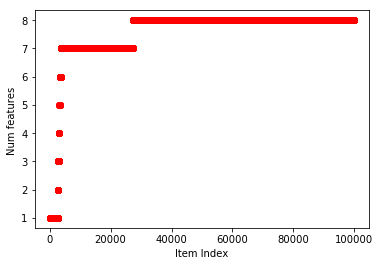

In [51]:
import matplotlib.pyplot as pyplot
%matplotlib inline  

pyplot.plot(features_per_item, 'ro')
pyplot.ylabel('Num features ')
pyplot.xlabel('Item Index')
pyplot.show()

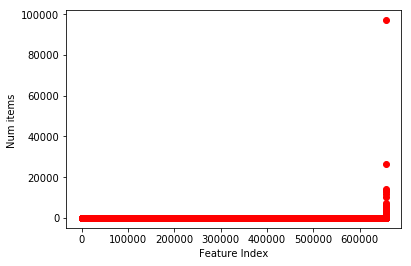

In [52]:
pyplot.plot(items_per_feature, 'ro')
pyplot.ylabel('Num items ')
pyplot.xlabel('Feature Index')
pyplot.show()

In [53]:
if SUBMISSION:
    train_final['count'] = train_final.groupby(['track_id']).transform('count')
    tracks_with_popularity = train_final.groupby(['track_id', 'count']).head(1).sort_values('count', ascending=False)
    target_tracks_with_popularity = pd.merge(target_tracks, tracks_with_popularity, on='track_id').groupby('track_id').head(1)
    target_tracks_with_popularity = target_tracks_with_popularity.sort_values('count').reset_index()
    print(target_tracks_with_popularity.head(5))
else:
    training_set['count'] = training_set.groupby(['track_id']).transform('count')
    tracks_with_popularity = training_set.groupby(['track_id', 'count']).head(1).sort_values('count', ascending=False)
    target_tracks_with_popularity = pd.merge(test_target_tracks, tracks_with_popularity, on='track_id').groupby('track_id').head(1)
    target_tracks_with_popularity = target_tracks_with_popularity.sort_values('count').reset_index()
    print(target_tracks_with_popularity.head(5))

   index  track_id  transformed_track_id  playlist_id  count
0   5869   2289961                 57595     10526030      1
1  12359   2209432                 55047      1687663      1
2  18662   1881593                 46606      3835179      1
3   1586   2898917                 74939     10951086      1
4  16309   1596853                 38903      5431593      1


count    21951.000000
mean        19.728577
std         30.163626
min          1.000000
25%          4.000000
50%          9.000000
75%         22.000000
max        458.000000
Name: count, dtype: float64


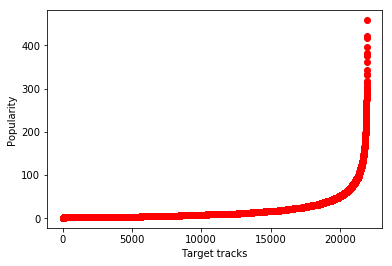

In [54]:
# target_tracks_popularity = target_tracks_with_popularity.sort_values('count').reset_index()
print(target_tracks_with_popularity['count'].describe())
pyplot.plot(target_tracks_with_popularity['count'], 'ro')
pyplot.ylabel('Popularity')
pyplot.xlabel('Target tracks')
pyplot.show()

In [55]:
popularity_sum = target_tracks_with_popularity['count'].sum()
target_tracks_with_popularity['predictions'] = target_tracks_with_popularity['count'] / popularity_sum * 30000

print(target_tracks_with_popularity.tail(5))
print(target_tracks_with_popularity['predictions'].sum())

print(target_tracks_with_popularity['predictions'].describe())

def round_ceil(x):
    x['predictions'] = int(math.ceil(x['predictions']))
    return x

def reduce_by_one(x):
    if x['predictions'] > 1:
        x['predictions'] = x['predictions'] - 1
    return x

target_tracks_with_predictions = target_tracks_with_popularity.apply(round_ceil, axis=1)
to_reduce = target_tracks_with_predictions['predictions'].sum() - 30000

print(target_tracks_with_predictions.tail(5))
print(target_tracks_with_predictions['predictions'].sum())

       index  track_id  transformed_track_id  playlist_id  count  predictions
21946     12   3166665                 82528     10384412    382    26.462724
21947    988   1595978                 38860      7944034    397    27.501836
21948   3816   3705881                 94749      5858765    418    28.956593
21949   9179   1363985                 33725     10772937    422    29.233689
21950    263   1563309                 38111      3098690    458    31.727559
30000.000000001237
count    21951.000000
mean         1.366680
std          2.089559
min          0.069274
25%          0.277097
50%          0.623467
75%          1.524031
max         31.727559
Name: predictions, dtype: float64
        index   track_id  transformed_track_id  playlist_id  count  \
21946    12.0  3166665.0               82528.0   10384412.0  382.0   
21947   988.0  1595978.0               38860.0    7944034.0  397.0   
21948  3816.0  3705881.0               94749.0    5858765.0  418.0   
21949  9179.0  1363985.

In [56]:
def is_relevant(recommendation_item, validation_set):
    validation_item = validation_set.loc[validation_set['playlist_id'] == recommendation_item['playlist_id']]
    recommendation_item['recommendation'] = pd.Series(recommendation_item['recommendation'])\
                                                .isin(list(validation_item['track_id']))
    return recommendation_item


def precision(recommended_items_relevance):
    precision_scores = recommended_items_relevance.sum(axis=1) / recommended_items_relevance.shape[1]
    return precision_scores.mean()


def mAP(recommended_items_relevance):
    p_at_k = recommended_items_relevance.cumsum(axis=1) / (1 + np.arange(recommended_items_relevance.shape[1]))
    recommended_items_mAP = p_at_k.sum(axis=1) / recommended_items_relevance.shape[1]
    return recommended_items_mAP.mean()


def evaluate_recommendations(recommended_items, validation_set):
    items_relevance = recommended_items.apply(lambda recommendation_item: is_relevant(recommendation_item, validation_set), axis=1)
    recommended_items_relevance = pd.DataFrame(list(items_relevance['recommendation']), index=items_relevance['recommendation'].index)
    precision_score = precision(recommended_items_relevance)
    mAP_score = mAP(recommended_items_relevance)
    return precision_score, mAP_score

def evaluate(recommended_items, validation_set):
    print('Evaluating...')
    begin = time.time()
    precision_score, mAP_score = evaluate_recommendations(recommended_items, validation_set)
    print('Precision: {0:.{digits}f}, mAP: {1:.{digits}f}, took {2:.{digits}f}s'
          .format(precision_score, mAP_score, time.time() - begin, digits=5))

In [57]:
def check_matrix(X, format='csc', dtype=np.float32):
    if format == 'csc' and not isinstance(X, scipy.sparse.csc_matrix):
        return X.tocsc().astype(dtype)
    elif format == 'csr' and not isinstance(X, scipy.sparse.csr_matrix):
        return X.tocsr().astype(dtype)
    elif format == 'coo' and not isinstance(X, scipy.sparse.coo_matrix):
        return X.tocoo().astype(dtype)
    elif format == 'dok' and not isinstance(X, scipy.sparse.dok_matrix):
        return X.todok().astype(dtype)
    elif format == 'bsr' and not isinstance(X, scipy.sparse.bsr_matrix):
        return X.tobsr().astype(dtype)
    elif format == 'dia' and not isinstance(X, scipy.sparse.dia_matrix):
        return X.todia().astype(dtype)
    elif format == 'lil' and not isinstance(X, scipy.sparse.lil_matrix):
        return X.tolil().astype(dtype)
    else:
        return X.astype(dtype)

In [58]:
class ISimilarity(object):
    """Abstract interface for the similarity metrics"""

    def __init__(self, shrinkage=10):
        self.shrinkage = shrinkage

    def compute(self, X):
        pass


class Cosine(ISimilarity):
    def compute(self, X):
        # convert to csc matrix for faster column-wise operations
        X = check_matrix(X, 'csc', dtype=np.float32)

        # 1) normalize the columns in X
        # compute the column-wise norm
        # NOTE: this is slightly inefficient. We must copy X to compute the column norms.
        # A faster solution is to  normalize the matrix inplace with a Cython function.
        Xsq = X.copy()
        Xsq.data **= 2
        norm = np.sqrt(Xsq.sum(axis=0))
        norm = np.asarray(norm).ravel()
        norm += 1e-6
        # compute the number of non-zeros in each column
        # NOTE: this works only if X is instance of sparse.csc_matrix
#         print(X.indptr)
        
        col_nnz = np.diff(X.indptr)
#         print(col_nnz)
        # then normalize the values in each column
        X.data /= np.repeat(norm, col_nnz)
        print("Normalized")
#         print(X[:2][:2])
#         print(norm)
#         print(col_nnz)

        # 2) compute the cosine similarity using the dot-product
        print("Computing distance")
        dist = X * X.T
        print("Computed")
        
        # zero out diagonal values
#         dist = dist - scipy.sparse.dia_matrix((dist.diagonal()[scipy.newaxis, :], [0]), shape=dist.shape)
#         print("Removed diagonal")
        
        # and apply the shrinkage
#         if self.shrinkage > 0:
#             dist = self.apply_shrinkage(X, dist)
#             print("Applied shrinkage")    
        
        return dist

    def apply_shrinkage(self, X, dist):
        # create an "indicator" version of X (i.e. replace values in X with ones)
        X_ind = X.copy()
        X_ind.data = np.ones_like(X_ind.data)
        # compute the co-rated counts
        co_counts = X_ind * X_ind.T
        # remove the diagonal
#         co_counts = co_counts - scipy.sparse.dia_matrix((co_counts.diagonal()[scipy.newaxis, :], [0]), shape=co_counts.shape)
        # compute the shrinkage factor as co_counts_ij / (co_counts_ij + shrinkage)
        # then multiply dist with it
        co_counts_shrink = co_counts.copy()
        co_counts_shrink.data += self.shrinkage
        co_counts.data /= co_counts_shrink.data
        dist.data *= co_counts.data
        return dist

In [ ]:
distance = Cosine()
isim = distance.compute(ICM_tags)

Normalized
Computing distance


In [42]:
class ContentBasedRecommender:
    def __init__(self, shrinkage=10, similarity='cosine'):
        self.shrinkage = shrinkage
        self.similarity_name = similarity
        if similarity == 'cosine':
            self.distance = Cosine(shrinkage=self.shrinkage)
        else:
            raise NotImplementedError('Distance {} not implemented'.format(similarity))
    
    def fit(self, training_set, ICM, target_tracks, tracks_with_title, playlist_titles, items_similarity):
        self.training_set = training_set
#         self.items_similarity = self.distance.compute(ICM)
        self.items_similarity = items_similarity
        self.tracks_with_title = tracks_with_title
        self.playlist_titles = playlist_titles
        
        self.target_tracks_mask = np.zeros(self.items_similarity.shape[0])
        for value in list(target_tracks['transformed_track_id']):
            self.target_tracks_mask[value] = 1
    
    def recommend(self, target_playlists):
        def make_recommendation(playlist):
            tracks_on_playlist = self.training_set.loc[self.training_set['playlist_id'] == playlist['playlist_id']]
            transformed_tracks_on_playlist = track_id_le.transform(list(tracks_on_playlist['track_id']))
            tracks_on_playlist_mask = np.ones(self.items_similarity.shape[0])
            for value in transformed_tracks_on_playlist:
                tracks_on_playlist_mask[value] = 0
            
#             titles = self.playlist_titles.loc[self.playlist_titles['playlist_id'] == playlist['playlist_id']]
#             titles_mask = np.squeeze(np.asarray(self.tracks_with_title[:, titles['title']].sum(axis=1)))
#             titles_mask = titles_mask / (np.amax(titles_mask)+ 1)
#             titles_mask = np.log(np.squeeze(np.asarray(titles_mask + 3)))
            tracks_tags_correlation = np.squeeze(np.asarray(recommender.items_similarity[:, transformed_tracks_on_playlist].sum(axis=1)))
            tracks_tags_correlation = tracks_tags_correlation * self.target_tracks_mask
            tracks_tags_correlation = tracks_tags_correlation * tracks_on_playlist_mask
#             tracks_tags_correlation = tracks_tags_correlation * titles_mask
            ind = np.argpartition(list(tracks_tags_correlation), -3)[-3:]
    
            recommended_tracks = track_id_le.inverse_transform(ind)
            playlist['recommendation'] = list(reversed(recommended_tracks))
            return playlist
        recommended_items = target_playlists.apply(lambda playlist: make_recommendation(playlist), axis=1)
        return recommended_items

In [43]:
print('Building model...')
begin = time.time()
recommender = ContentBasedRecommender()
recommender.fit(training_set, ICM_tags, test_target_tracks, tracks_with_title, playlist_titles, isim)
# recommender.fit(train_final, ICM_tags, target_tracks, tracks_with_title, playlist_titles)
print('Took {0:.{digits}f}s'.format(time.time() - begin, digits=5))

Building model...
Took 0.00971s


In [44]:
print('Recommending...')
begin = time.time()
recommended_items = recommender.recommend(target_playlists.head(1))
print('Took {0:.{digits}f}s'.format(time.time() - begin, digits=5))

print('recommended_items {}'.format(recommended_items.shape))
print(recommended_items.head(3))

Recommending...
0.00925398
0.00161535
0.00733747
0.00128768
7.45212e-05
0.00128768
0.00378555
0.00191661
0.00115727
0.00128768
0.00206662
0.00112676
0.00743414
0.00171233
7.45212e-05
0.00128768
0.000517018
0.000511202
0.000957029
0.00321512
0.00981651
0.0086085
0.00154857
0.00128768
0.00103155
0.00148792
0.00128768
0.000517018
0.00718099
0.00378555
0.00431022
0.000517018
0.00360745
0.00210011
0.00596783
0.000862543
0.00128768
0.00020024
0.00128768
0.00147405
0.00128768
7.45212e-05
0.00231977
0.00206662
0.00732081
0.00360745
0.00338779
0.00364094
0.00112676
0.00360745
7.45212e-05
0.0037932
0.00128768
0.00282852
0.00115727
0.00431022
0.000436681
0.000957029
0.0037932
7.45212e-05
0.000957029
7.45212e-05
0.00244495
0.00386772
0.00733747
0.00741545
0.00386772
0.00872182
0.00958699
0.0037932
0.0111042
0.00103155
0.00128768
0.00266759
0.00769801
7.45212e-05
0.0111042
0.00431022
0.00128768
0.00128768
0.00244495
7.45212e-05
0.00637454
0.00386772
0.00718099
0.220547
0.000436681
0.000788022
0.000

In [40]:
if not SUBMISSION:
    evaluate(recommended_items, validation_set)

Evaluating...
Precision: 0.13667, mAP: 0.15389, took 0.28809s


In [76]:
print(recommended_items.shape)
print(recommended_items.sort_values('playlist_id').head(10))
print(validation_set.loc[validation_set['playlist_id'].isin(recommended_items['playlist_id'])])

(6, 2)
   playlist_id               recommendation
4        65078   [1675097, 1893087, 949178]
3      4267369  [2504992, 1999966, 2062260]
2      4891851    [557629, 3016360, 521035]
0     10024884     [320980, 820484, 291014]
1     10624787   [343990, 1788063, 2790769]
5     10637124   [273502, 3358237, 3727608]
       playlist_id  track_id
291          65078    949178
292          65078   2225673
293          65078   2146602
7587       4267369   3157456
7588       4267369   2062260
7589       4267369   1538115
9357       4891851    557629
9358       4891851      4123
9359       4891851   1498009
24012     10024884    471263
24013     10024884   2773840
24014     10024884   3481281
26454     10624787   1913831
26455     10624787   1104333
26456     10624787   3219522
26496     10637124   3358237
26497     10637124    273502
26498     10637124   1818594


In [64]:
def print_results(recommended_items, filename):
    print('Printing...')
    with open('./submissions/{}'.format(filename), 'w') as output_file:
        output_file.write('playlist_id,track_ids\n')
        for index, recommendation in recommended_items.iterrows():
            row = '{},'.format(recommendation['playlist_id'])
            for track_id in pd.Series(recommendation['recommendation']).values:
                row += ' {}'.format(track_id)
            row += '\n'
            output_file.write(row)
print_results(recommended_items, filename=SUBMISSION_FILENAME if SUBMISSION else TEST_FILENAME)

Printing...
